In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

from IPython.display import SVG, Image
from livelossplot.tf_keras import PlotLossesCallback
import tensorflow as tf


In [4]:
cotton_dl_dir = os.path.join("C:/Users/Prasann/Project/Creating test and train/PLant dataset/cotton/Cotton Disease/train/diseased cotton leaf")
cotton_dp_dir = os.path.join("C:/Users/Prasann/Project/Creating test and train/PLant dataset/cotton/Cotton Disease/train/diseased cotton plant")
cotton_hl_dir = os.path.join("C:/Users/Prasann/Project/Creating test and train/PLant dataset/cotton/Cotton Disease/train/fresh cotton leaf")
cotton_hp_dir = os.path.join("C:/Users/Prasann/Project/Creating test and train/PLant dataset/cotton/Cotton Disease/train/fresh cotton plant")
pepper_bbs_dir = os.path.join("C:/Users/Prasann/Project/Creating test and train/PLant dataset/pepper_bell/training/Pepper__bell___Bacterial_spot")
pepper_bh_dir = os.path.join("C:/Users/Prasann/Project/Creating test and train/PLant dataset/pepper_bell/training/Pepper__bell___healthy")
potato_eb_dir = os.path.join("C:/Users/Prasann/Project/Creating test and train/PLant dataset/Potato/Train/Potato___Early_blight")
potato_h_dir = os.path.join("C:/Users/Prasann/Project/Creating test and train/PLant dataset/Potato/Train/Potato___healthy")
potato_l_dir = os.path.join("C:/Users/Prasann/Project/Creating test and train/PLant dataset/Potato/Train/Potato___Late_blight")
tomato_bs_dir = os.path.join("C:/Users/Prasann/Project/Creating test and train/PLant dataset/tomato/train/Tomato___Bacterial_spot")
tomato_eb_dir = os.path.join("C:/Users/Prasann/Project/Creating test and train/PLant dataset/tomato/train/Tomato___Early_blight")
tomato_h_dir = os.path.join("C:/Users/Prasann/Project/Creating test and train/PLant dataset/tomato/train/Tomato___healthy")
tomato_lb_dir = os.path.join("C:/Users/Prasann/Project/Creating test and train/PLant dataset/tomato/train/Tomato___Late_blight")
tomato_lm_dir = os.path.join("C:/Users/Prasann/Project/Creating test and train/PLant dataset/tomato/train/Tomato___Leaf_Mold")
tomato_sls_dir = os.path.join("C:/Users/Prasann/Project/Creating test and train/PLant dataset/tomato/train/Tomato___Septoria_leaf_spot")
tomato_smtsm_dir = os.path.join("C:/Users/Prasann/Project/Creating test and train/PLant dataset/tomato/train/Tomato___Spider_mites Two-spotted_spider_mite")
tomato_ts_dir = os.path.join("C:/Users/Prasann/Project/Creating test and train/PLant dataset/tomato/train/Tomato___Target_Spot")
tomato_tmv_dir = os.path.join("C:/Users/Prasann/Project/Creating test and train/PLant dataset/tomato/train/Tomato___Tomato_mosaic_virus")
tomato_ylc_dir = os.path.join("C:/Users/Prasann/Project/Creating test and train/PLant dataset/tomato/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus")
                   
print('total training cotton_dl_dir images:', len(os.listdir(cotton_dl_dir)))
print('total training cotton_dp images:', len(os.listdir(cotton_dp_dir)))
print('total training cotton_hl_dir images:', len(os.listdir(cotton_hl_dir)))
print('total training cotton_hp_dir images:', len(os.listdir(cotton_hp_dir)))
print('total training potato_h images:', len(os.listdir(potato_h_dir)))
print('total training potao_eb images:', len(os.listdir(potato_eb_dir)))
print('total training potato_l images:', len(os.listdir(potato_l_dir)))
print('total training pepper_bbs_dir images:', len(os.listdir(pepper_bbs_dir)))
print('total training pepper_bh_dir images:', len(os.listdir(pepper_bh_dir)))
print('total training tomato_bs_dir images:', len(os.listdir(tomato_bs_dir)))
print('total training tomato_eb_dir images:', len(os.listdir(tomato_eb_dir)))
print('total training tomato_h_dir images:', len(os.listdir(tomato_h_dir)))
print('total training tomato_lb_dir images:', len(os.listdir(tomato_lb_dir)))
print('total training tomato_lm_dir images:', len(os.listdir(tomato_lm_dir)))
print('total training tomato_sls_dir images:', len(os.listdir(tomato_sls_dir)))
print('total training tomato_smtsm_dir images:', len(os.listdir(tomato_smtsm_dir)))
print('total training tomato_ts_dir images:', len(os.listdir(tomato_ts_dir)))
print('total training tomato_tmv_dir images:', len(os.listdir(tomato_tmv_dir)))
print('total training tomato_ylc_dir images:', len(os.listdir(tomato_ylc_dir)))



total training cotton_dl_dir images: 288
total training cotton_dp images: 815
total training cotton_hl_dir images: 427
total training cotton_hp_dir images: 421
total training potato_h images: 300
total training potao_eb images: 300
total training potato_l images: 300
total training pepper_bbs_dir images: 897
total training pepper_bh_dir images: 1330
total training tomato_bs_dir images: 1000
total training tomato_eb_dir images: 1000
total training tomato_h_dir images: 1000
total training tomato_lb_dir images: 1000
total training tomato_lm_dir images: 1000
total training tomato_sls_dir images: 1000
total training tomato_smtsm_dir images: 1000
total training tomato_ts_dir images: 1000
total training tomato_tmv_dir images: 1000
total training tomato_ylc_dir images: 1000


In [5]:

img_size = 48
batch_size = 64

datagen_train = ImageDataGenerator(horizontal_flip=True)

train_generator = datagen_train.flow_from_directory("C:/Users/Prasann/Project/Creating test and train/Train/",
                                                    target_size=(img_size,img_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)

datagen_validation = ImageDataGenerator(horizontal_flip=True)
validation_generator = datagen_validation.flow_from_directory("C:/Users/Prasann/Project/Creating test and train/Test/",
                                                    target_size=(img_size,img_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=False)


Found 15078 images belonging to 19 classes.
Found 1654 images belonging to 19 classes.


In [6]:

# Initialising the CNN
model = Sequential()

# 1 - Convolution
model.add(Conv2D(64,(3,3), padding='same', input_shape=(48, 48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 2nd Convolution layer
model.add(Conv2D(128,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 3rd Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 4th Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flattening
model.add(Flatten())

# Fully connected layer 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(19, activation='softmax'))

opt = Adam(lr=0.0005)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
activation (Activation)      (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       204928    
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 128)       5

C:\Users\Prasann\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


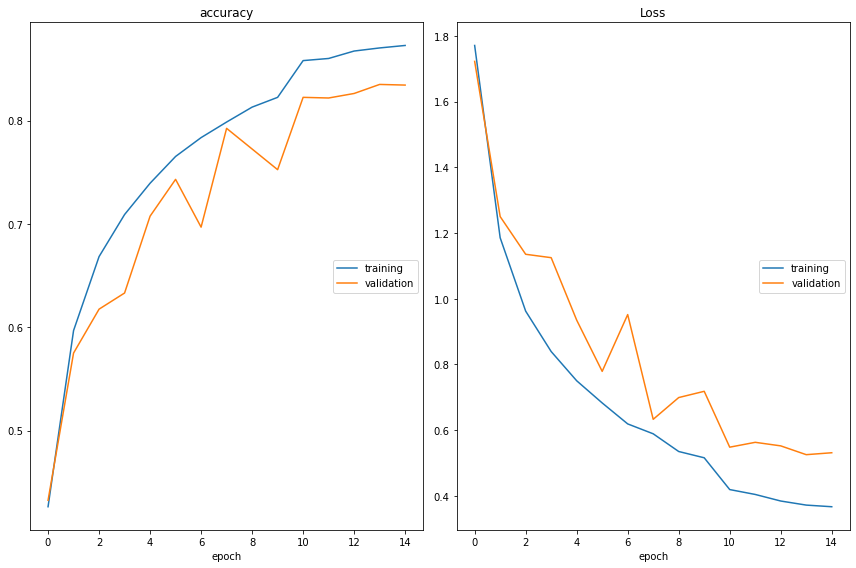

accuracy
	training         	 (min:    0.426, max:    0.873, cur:    0.873)
	validation       	 (min:    0.433, max:    0.835, cur:    0.834)
Loss
	training         	 (min:    0.367, max:    1.771, cur:    0.367)
	validation       	 (min:    0.525, max:    1.722, cur:    0.531)

Epoch 00015: saving model to model_weights.h5


In [6]:


epochs = 15
steps_per_epoch = train_generator.n//train_generator.batch_size
validation_steps = validation_generator.n//validation_generator.batch_size

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=2, min_lr=0.00001, mode='auto')
checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_accuracy',
                             save_weights_only=True, mode='max', verbose=1)
callbacks = [PlotLossesCallback(), checkpoint, reduce_lr]

history = model.fit(
    x=train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data = validation_generator,
    validation_steps = validation_steps,
    callbacks=callbacks
)

In [7]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [8]:
PLANT_PROJ_SAVED_MODEL = "pd_saved_model"
tf.saved_model.save(model, PLANT_PROJ_SAVED_MODEL)
converter = tf.lite.TFLiteConverter.from_saved_model(PLANT_PROJ_SAVED_MODEL)
tflite_model = converter.convert()


FOR DEVS: If you are overwriting _tracking_metadata in your class, this property has been used to save metadata in the SavedModel. The metadta field will be deprecated soon, so please move the metadata to a different file.
INFO:tensorflow:Assets written to: pd_saved_model\assets


In [9]:
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

In [11]:
import numpy as np
import random
from IPython.display import Image
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
horse_img_files = [os.path.join("C:/Users/Prasann/Project/Creating test and train/PLant dataset/cotton/Cotton Disease/train/diseased cotton leaf", f) for f in cotton_dl_dir]
human_img_files = [os.path.join("C:/Users/Prasann/Project/Creating test and train/PLant dataset/cotton/Cotton Disease/train/diseased cotton plant", f) for f in cotton_dp_dir]
img_path = random.choice(horse_img_files + human_img_files)

img = Image(filename = img_path, width = img_size, height = img_size)
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers[1:]]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

ValueError: Cannot embed the 'c:/users/prasann/project/creating test and train/plant dataset/cotton/cotton disease/train/diseased cotton leaf\c' image format